In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

#### WarmUpExercise

In [2]:
def warmUpExercise():
    return np.identity(5)
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Linear Regression with One Variable

#### Plotting the Data

In [3]:
# Print the head of the data
data = np.loadtxt('data/ex1data1.txt',delimiter = ',')
print('Dimensions: ', data.shape)
print(data[:5])

[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


In [4]:
# Preparing training data

# Add X0 column on training dataset
X = np.column_stack((np.ones(data.shape[0]),data[:,0]))
# Below two state performs same
##stack = np.stack((np.ones(y.size),X),axis = -1)
# Using [] instead of ()
##np.c_[np.ones(y.size),X]

# Convert y from shape(97,) to (97,1)
# (-1,1) the -1 indicates infer the size of the new dimension from the input array
y = np.reshape(data[:,1],(-1,1))
print(X.shape)
print(y.shape)

(97, 2)
(97, 1)


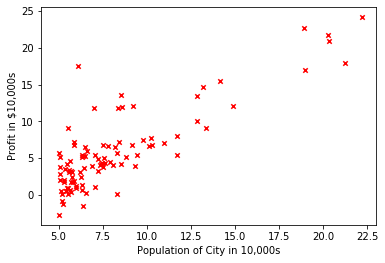

In [5]:
# Plotting the data
plt.scatter(X[:,1],y,s=20,c='r',marker='x')
# According to data, set x-axis limit
plt.xlim(4,23)
plt.xlabel('Population of City in 10,000s')
# Using semicolon ; to prevent output in IPython or JupyterNotebook
plt.ylabel('Profit in $10,000s');

#### Gradient Descent

In [6]:
# Cost Function
def computeCost(X,y,theta):
    m = y.size
    h = X.dot(theta)
    j = np.sum(np.square(h - y))/(2 * m)
    return j

# Compute Cost for theta (0,0)
theta = [[0],[0]]
computeCost(X,y,theta)

32.072733877455676

In [7]:
# Gradient Descent
def gradientDescent(X,y,theta=[[0],[0]],alpha=0.01,num_iters = 1500):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in np.arange(num_iters):
        theta -= alpha / m * (X.T.dot(X.dot(theta) - y))
        J_history[i] = computeCost(X,y,theta)
    return theta,J_history

theta:  [-3.63029144  1.16636235]


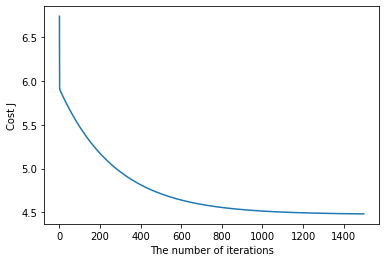

In [8]:
# Plot the J(theta)
theta, J_history = gradientDescent(X,y)
# ravel: Return a contiguous flattened array
# i.e convert the multi-dimensional to one-dimensional array
print('theta: ',theta.ravel())

plt.plot(range(1500),J_history)
plt.xlabel('The number of iterations')
plt.ylabel('Cost J');

In [9]:
# Using Gradient Descent to predict profits in areas of 35,000 and 70,000 people
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


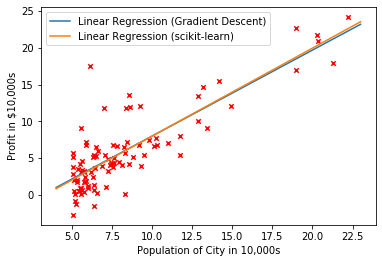

In [10]:
# Construst Testing Data
xx = np.arange(4,24)
test_x = np.column_stack((np.ones(20),xx))

# Predict using Gradient Descent
gra_y = test_x.dot(theta)

# Predict using scikit-learn linear regression
lire = LinearRegression()
lire.fit(X[:,1].reshape(-1,1),y.ravel())
lin_y = lire.intercept_ + lire.coef_ * xx

# Plot gradient descent linear regression
plt.scatter(X[:,1],y,s=20,c='r',marker='x')
plt.plot(xx, gra_y, label = 'Linear Regression (Gradient Descent)')

# Plot scikit-learn linear regression
plt.plot(xx,lin_y, label = 'Linear Regression (scikit-learn)')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend();

#### Contour Plot and Surface Plot

In [11]:
# Create grid coordinates for plotting

# np.linspace: return evenly spaced numbers over a specified interval
# linspace(start, stop, nums)
G0 = np.linspace(-10, 10, 50)
G1 = np.linspace(-1, 4, 50)
# np.meshgrid: return coordinate matrices from coordinate vectors
xx, yy = np.meshgrid(G0, G1, indexing = 'xy')
print(xx[0,0:2])
print(yy[0:2,0])

[-10.          -9.59183673]
[-1.         -0.89795918]


In [12]:
# Calculate Cost value(z) based on grid of coefficients
Z = np.zeros((G0.size, G1.size))
# np.ndenumerate: return an iterator yielding pairs of array coordinates and values
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X, y, theta = [[xx[i,j]],[yy[i,j]]])

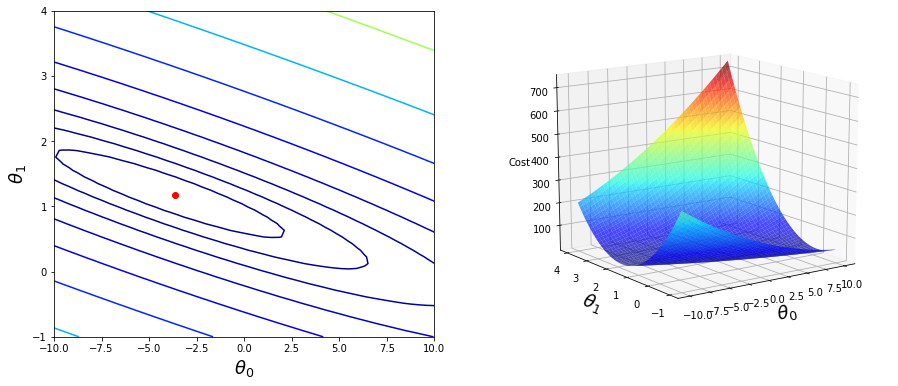

In [13]:
# Construct the plot
figure = plt.figure(figsize = (15,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122, projection = '3d')

# Left plot
# np.logspace: return numbers spaced evenly on a log scale
# levels: determine the number and positions of the contour lines
ax1.contour(xx, yy, Z, levels = np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')
ax1.set_xlabel(r'$\theta_0$',fontsize = 18)
ax1.set_ylabel(r'$\theta_1$',fontsize = 18)

# Right plot
# alpha = 0: transparent, 1: opaque
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha = 0.7, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
# view_init: Set the elevation and azimuth of the axes. To rotate the axes programatically.
# ‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.
ax2.view_init(elev=15, azim=235)
ax2.set_xlabel(r'$\theta_0$',fontsize = 18)
ax2.set_ylabel(r'$\theta_1$',fontsize = 18);

### Linear Regression with Multiple Variable

#### Feature Normalization

In [14]:
data_multi = np.loadtxt('data/ex1data2.txt',delimiter = ',')
print(data_multi[:5])

[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


In [15]:
X_m = data_multi[:,:2]
y_m = np.reshape(data_multi[:,2],(-1,1))
mu = np.mean(X_m, axis = 0)
std = np.std(X_m, axis = 0)
stdX = (X_m - mu)/std
stdX = np.column_stack((np.ones(stdX.shape[0]), stdX))
print('After feature normalization, the mean value will be equal to 0: ', np.mean(stdX, axis = 0))
print('After feature normalization, the std value will be equal to 1:  ', np.std(stdX, axis = 0))

After feature normalization, the mean value will be equal to 0:  [ 1.00000000e+00 -9.44870659e-18  2.48028548e-16]
After feature normalization, the std value will be equal to 1:   [0. 1. 1.]


#### Gradient Descent for multiple variable linear regression

theta for alpha 0.01:  [340412.56301439 109370.05670466  -6500.61509507]
theta for alpha 0.07:  [340412.65957447 109447.79646964  -6578.35485416]


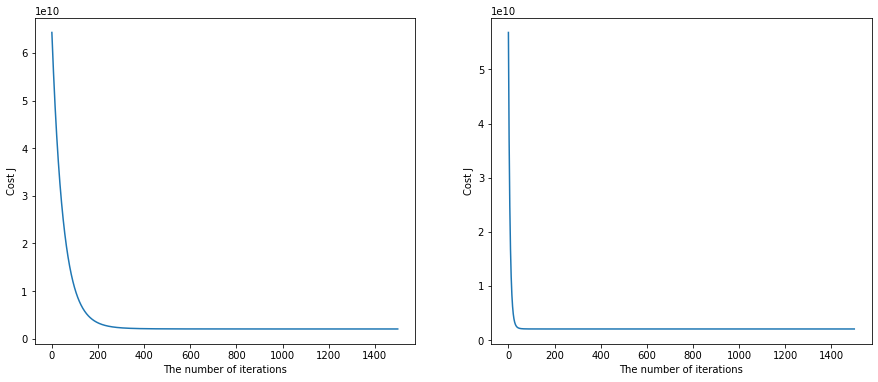

In [16]:
# Same function as One variable
# alpha = 0.01 by default
theta_small, J_history_small = gradientDescent(stdX,y_m,theta = [[0],[0],[0]])
print('theta for alpha 0.01: ', theta_small.ravel())
# alpha = 0.07
theta_medium, J_history_medium = gradientDescent(stdX, y_m, theta = [[0],[0],[0]], alpha = 0.07)
print('theta for alpha 0.07: ', theta_medium.ravel())

# Construct the sub plot
fig = plt.figure(figsize = (15,6))
a1 = fig.add_subplot(121)
a2 = fig.add_subplot(122)

# Plot cost history
a1.plot(range(1500), J_history_small)
a2.plot(range(1500), J_history_medium)

# Add common label
for a in fig.axes:
    a.set_xlabel('The number of iterations')
    a.set_ylabel('Cost J')

In [17]:
# Using Gradient Descent to predict price of a house with 1650 square feet and 3 bedrooms
print(theta_medium.T.dot([1, 1650, 3]))

[1.80909542e+08]


### Normal Equation
$$X \cdot \theta = y\;\;\; -> \;\;\;\theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y$$

In [18]:
theta_ne = np.linalg.inv(stdX.T.dot(stdX)).dot(stdX.T).dot(y_m)
print(theta_ne.ravel())

[340412.65957447 109447.79646964  -6578.35485416]


In [19]:
# Compare the error of 3 versions of theta
cost_s = J_history_small[-1]
cost_m = J_history_medium[-1]
cost_ne = computeCost(stdX, y_m, theta_ne)
print('cost of alpha 0.01:      ', cost_s)
print('cost of alpha 0.07:      ', cost_m)
print('cost of normal equation: ', cost_ne)

cost of alpha 0.01:       2043282709.9327548
cost of alpha 0.07:       2043280050.6028287
cost of normal equation:  2043280050.6028283
